In [17]:
from datetime import datetime
import csv
import pandas as pd

df = pd.read_csv('time_decapping.csv',sep=',',names=['vial','row','col','time'])

In [18]:
Lpenfill = df[df['vial'] == 1]
Spenfill = df[df['vial'] == 0]

In [19]:
Lpenfill['total_sec'] = Lpenfill['time'].apply(lambda x: datetime.strptime(x, '%H:%M:%S.%f').time())
Spenfill['total_sec'] = Spenfill['time'].apply(lambda x: datetime.strptime(x, '%H:%M:%S.%f').time())

C:\Users\IVSN\AppData\Local\Temp\ipykernel_8824\16488531.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Lpenfill['total_sec'] = Lpenfill['time'].apply(lambda x: datetime.strptime(x, '%H:%M:%S.%f').time())
C:\Users\IVSN\AppData\Local\Temp\ipykernel_8824\16488531.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Spenfill['total_sec'] = Spenfill['time'].apply(lambda x: datetime.strptime(x, '%H:%M:%S.%f').time())


In [20]:
Lpenfill['total_sec'] = Lpenfill['total_sec'].apply(lambda x: x.second + x.minute*60 + x.microsecond/1000000)
Spenfill['total_sec'] = Spenfill['total_sec'].apply(lambda x: x.second + x.minute*60 + x.microsecond/1000000)

C:\Users\IVSN\AppData\Local\Temp\ipykernel_8824\4103369552.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Lpenfill['total_sec'] = Lpenfill['total_sec'].apply(lambda x: x.second + x.minute*60 + x.microsecond/1000000)
C:\Users\IVSN\AppData\Local\Temp\ipykernel_8824\4103369552.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Spenfill['total_sec'] = Spenfill['total_sec'].apply(lambda x: x.second + x.minute*60 + x.microsecond/1000000)


In [26]:
print("first row small",Spenfill[Spenfill['row']<2].total_sec.mean(),
Spenfill[Spenfill['row']<2].total_sec.std()
)
print("rest of rows small",Spenfill[Spenfill['row']>2].total_sec.mean(),
Spenfill[Spenfill['row']>2].total_sec.std()
)
print("first of rows small max",
Spenfill[Spenfill['row']<2].total_sec.max()
)
print("first of rows small min",
Spenfill[Spenfill['row']<2].total_sec.min())
print("rest of rows small max",
Spenfill[Spenfill['row']>2].total_sec.max()
)
print("rest of rows small min",
Spenfill[Spenfill['row']>2].total_sec.min()
)
print("first row large",Lpenfill[Lpenfill['row']<2].total_sec.mean(),
Lpenfill[Lpenfill['row']<2].total_sec.std()
)
print("rest of rows  large",Lpenfill[Lpenfill['row']>2].total_sec.mean(),
Lpenfill[Lpenfill['row']>2].total_sec.std()
)
print("rest of rows large max",
Lpenfill[Lpenfill['row']>2].total_sec.max()
)
print("rest of rows large min",
Lpenfill[Lpenfill['row']>2].total_sec.min()
)
print("first of rows large max",
Lpenfill[Lpenfill['row']<2].total_sec.max()
)
print("first of rows large min",
Lpenfill[Lpenfill['row']<2].total_sec.min())



first row small 17.14330382758621 0.7640881953134948
rest of rows small 44.73640001666666 1.3260929280131637
first of rows small max 19.04601
first of rows small min 15.508964
rest of rows small max 48.452517
rest of rows small min 42.055867
first row large 16.775310210526317 0.783245886703359
rest of rows  large 44.3090161891892 1.3145117693386077
rest of rows large max 48.819044
rest of rows large min 41.500229
first of rows large max 18.047442
first of rows large min 15.224015


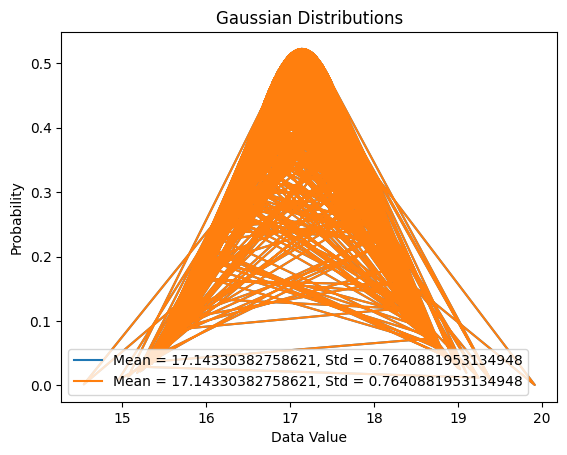

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

mean_small = Spenfill[Spenfill['row']<2].total_sec.mean()
std_small = Spenfill[Spenfill['row']<2].total_sec.std()
mean_large = Lpenfill[Lpenfill['row']<2].total_sec.mean()
std_large = Lpenfill[Lpenfill['row']<2].total_sec.std()

mean_small_rest = Spenfill[Spenfill['row']>2].total_sec.mean()
std_small_rest = Spenfill[Spenfill['row']>2].total_sec.std()
mean_large_rest = Lpenfill[Lpenfill['row']>2].total_sec.mean()
std_large_rest = Lpenfill[Lpenfill['row']>2].total_sec.std()

# Create two sets of data with the specified means and standard deviations
data_small = np.random.normal(mean_small, std_small, 1000)
data_large = np.random.normal(mean_large, std_large, 1000)
data_small_rest = np.random.normal(mean_small_rest, std_small_rest, 1000)
data_large_rest = np.random.normal(mean_large_rest, std_large_rest, 1000)


# Plot the two sets of data
plt.plot(data_small, norm.pdf(data_small, mean_small, std_small), label='Mean = ' + str(mean_small) + ', Std = ' + str(std_small))
plt.plot(data_small, norm.pdf(data_small, mean_small, std_small), label='Mean = ' + str(mean_small) + ', Std = ' + str(std_small))



# Add a title and labels to the axes
plt.title('Gaussian Distributions')
plt.xlabel('Data Value')
plt.ylabel('Probability')

# Add a legend
plt.legend()

# Show the plot
plt.show()

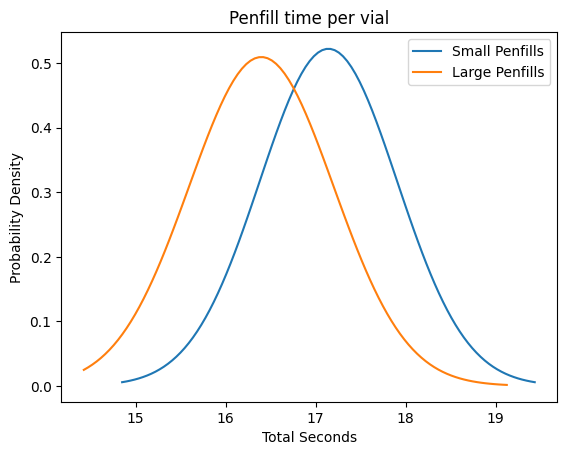

In [37]:
mean = mean_small
std = std_small
mean2 = mean_large
std2 = std_large

# Generate data points for the x-axis
x = np.linspace(mean - 3*std, mean + 3*std, 100)

# Compute corresponding y-values using the Gaussian distribution formula
y = np.exp(-(x - mean)**2 / (2*std**2)) / (std * np.sqrt(2*np.pi))
x2 = np.linspace(mean2 - 3*std2, mean2 + 3*std2, 100)

# Compute corresponding y-values using the Gaussian distribution formula
y2 = np.exp(-(x - mean2)**2 / (2*std2**2)) / (std2 * np.sqrt(2*np.pi))

# Plot the Gaussian distribution
plt.plot(x, y, label='Small Penfills')
plt.plot(x2, y2, label='Large Penfills')
plt.legend(loc='upper right')
plt.xlabel('Total Seconds')
plt.ylabel('Probability Density')
plt.title('Penfill time per vial')
plt.show()

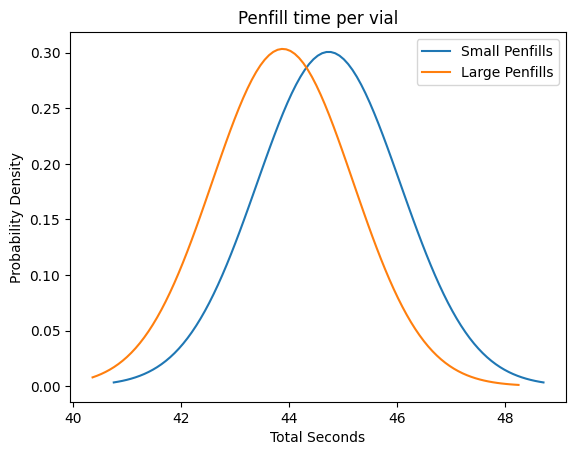

In [38]:
mean = mean_small_rest
std = std_small_rest
mean2 = mean_large_rest
std2 = std_large_rest

# Generate data points for the x-axis
x = np.linspace(mean - 3*std, mean + 3*std, 100)

# Compute corresponding y-values using the Gaussian distribution formula
y = np.exp(-(x - mean)**2 / (2*std**2)) / (std * np.sqrt(2*np.pi))
x2 = np.linspace(mean2 - 3*std2, mean2 + 3*std2, 100)

# Compute corresponding y-values using the Gaussian distribution formula
y2 = np.exp(-(x - mean2)**2 / (2*std2**2)) / (std2 * np.sqrt(2*np.pi))

# Plot the Gaussian distribution
plt.plot(x, y, label='Small Penfills')
plt.plot(x2, y2, label='Large Penfills')
plt.legend(loc='upper right')
plt.xlabel('Total Seconds')
plt.ylabel('Probability Density')
plt.title('Penfill time per vial')
plt.show()

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'total_sec' is a column in the 'penfill' DataFrame

# Calculate mean and standard deviation
mean = penfill['total_sec'].mean()
std = penfill['total_sec'].std()

# Generate data points for x-axis
x = np.linspace(mean - 3*std, mean + 3*std, 100)

# Compute corresponding y-values using Gaussian distribution formula
y = np.exp(-(x - mean)**2 / (2*std**2)) / (std * np.sqrt(2*np.pi))

# Plot the Gaussian distribution
plt.plot(x, y)
plt.xlabel('Total Seconds')
plt.ylabel('Probability Density')
plt.title('Penfill time per vial')
plt.show()

NameError: name 'penfill' is not defined

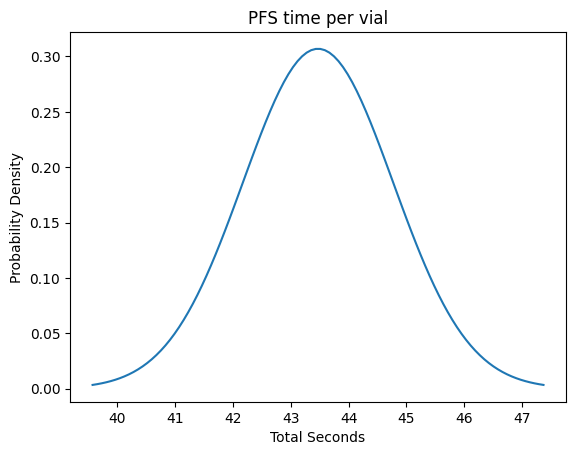

In [ ]:


# Assuming 'total_sec' is a column in the 'penfill' DataFrame

# Calculate mean and standard deviation
mean = pfs['total_sec'].mean()
std = pfs['total_sec'].std()

# Generate data points for x-axis
x = np.linspace(mean - 3*std, mean + 3*std, 100)

# Compute corresponding y-values using Gaussian distribution formula
y = np.exp(-(x - mean)**2 / (2*std**2)) / (std * np.sqrt(2*np.pi))

# Plot the Gaussian distribution
plt.plot(x, y)
plt.xlabel('Total Seconds')
plt.ylabel('Probability Density')
plt.title('PFS time per vial')
plt.show()

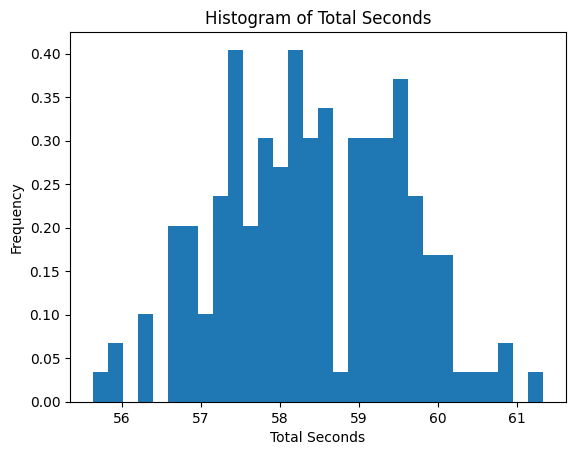

In [ ]:

# Create histogram
plt.hist(penfill['total_sec'], bins=30, density=True)

# Set axis labels and title
plt.xlabel('Total Seconds')
plt.ylabel('Frequency')
plt.title('Histogram of Total Seconds')

# Display the plot
plt.show()

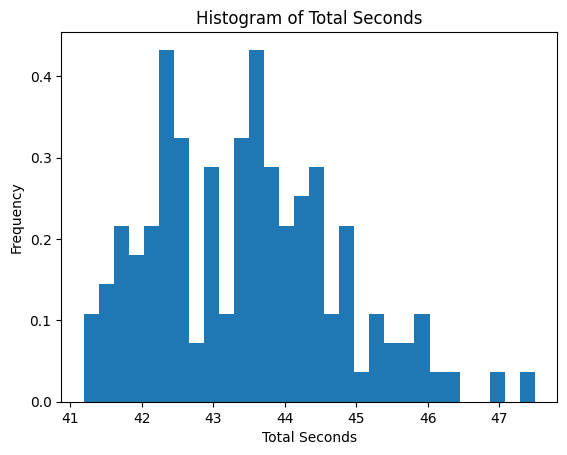

In [ ]:
# Create histogram
plt.hist(pfs['total_sec'], bins=30, density=True)

# Set axis labels and title
plt.xlabel('Total Seconds')
plt.ylabel('Frequency')
plt.title('Histogram of Total Seconds')

# Display the plot
plt.show()